<a href="https://colab.research.google.com/github/chychur/ds-09/blob/main/Neural_network_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network using Keras

Let's create a neural network using Keras mechanisms that will classify products from the [fasion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=ru "fasion_mnist dataset").

Let's define the network architecture. The accuracy of the most naive but adequate neural network is about 91%, so the figure should not be lower. To achieve such values, you need to experiment with the hyperparameters of the network:

* number of layers;

* the number of neurons;

* activation functions;

* number of epochs;

* batch size;

* choice of optimizer;

* various regularization techniques, etc.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=150,
    validation_data=(X_test, y_test)
)

Epoch 1/20
400/400 [==============================] - 48s 117ms/step - loss: 0.6284 - accuracy: 0.7678 - val_loss: 0.4518 - val_accuracy: 0.8383
Epoch 2/20
400/400 [==============================] - 47s 117ms/step - loss: 0.3814 - accuracy: 0.8630 - val_loss: 0.3778 - val_accuracy: 0.8656
Epoch 3/20
400/400 [==============================] - 46s 114ms/step - loss: 0.3252 - accuracy: 0.8823 - val_loss: 0.3299 - val_accuracy: 0.8831
Epoch 4/20
400/400 [==============================] - 46s 116ms/step - loss: 0.2909 - accuracy: 0.8939 - val_loss: 0.3105 - val_accuracy: 0.8859
Epoch 5/20
400/400 [==============================] - 45s 112ms/step - loss: 0.2660 - accuracy: 0.9037 - val_loss: 0.3128 - val_accuracy: 0.8861
Epoch 6/20
400/400 [==============================] - 44s 109ms/step - loss: 0.2498 - accuracy: 0.9087 - val_loss: 0.2788 - val_accuracy: 0.9030
Epoch 7/20
400/400 [==============================] - 45s 112ms/step - loss: 0.2327 - accuracy: 0.9134 - val_loss: 0.2852 - val_ac

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
class_names = [str(i) for i in range(1, 11)]
print("Classification Report:")

print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 3s 9ms/step - loss: 0.2959 - accuracy: 0.9148
Test accuracy: 0.9147999882698059
313/313 [==============================] - 3s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.89      0.86      1000
           2       0.99      0.98      0.99      1000
           3       0.86      0.90      0.88      1000
           4       0.93      0.92      0.92      1000
           5       0.85      0.90      0.87      1000
           6       0.98      0.98      0.98      1000
           7       0.82      0.68      0.74      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.98      0.97      1000
          10       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [11]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 3s 8ms/step - loss: 0.2959 - accuracy: 0.9148
[0.29588696360588074, 0.9147999882698059]


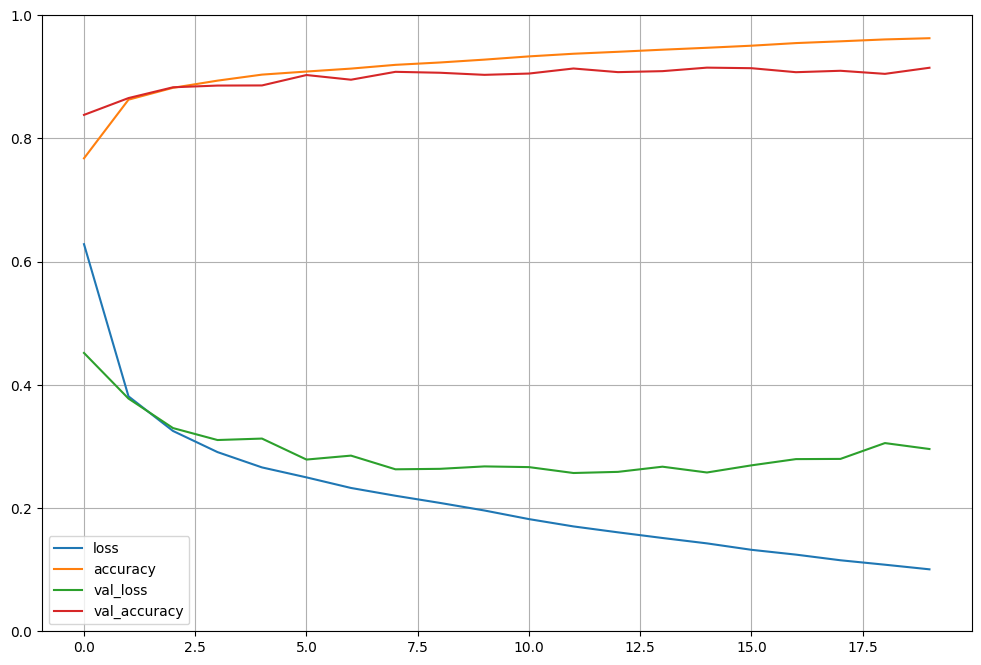

In [12]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 4s 13ms/step


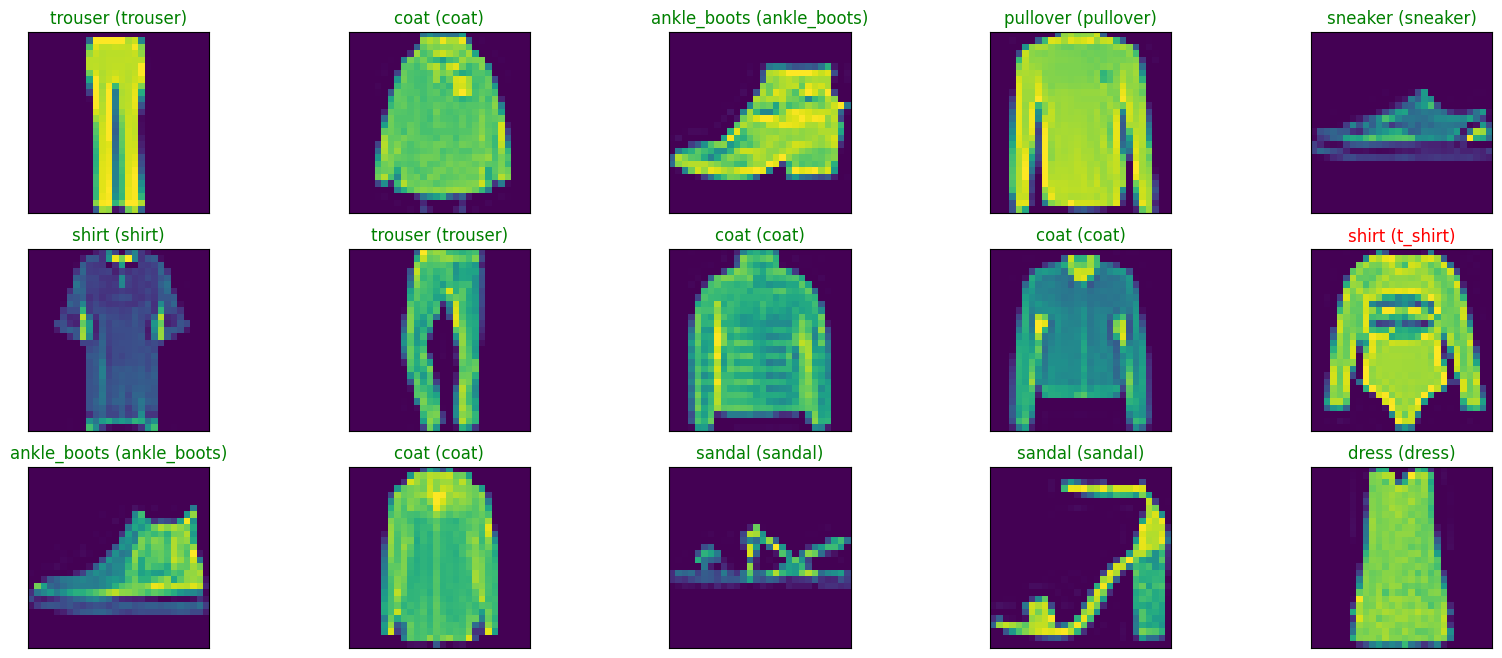

In [13]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### Conclusion

The model built using the specified layers of the [Convolutional Neural Network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network "Convolutional Neural Network (CNN)") showed a high level of performance on the task of image classification from [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=ru "Fashion MNIST").

1. **Accuracy of the model:** The overall accuracy of the model on the test data set was about **91%**, indicating its ability to effectively classify different clothing categories.

2. **Model parameters:** The total number of model parameters is more than **93 thousand**, which indicates the ability of the model to learn complex relationships in the input data.

3. **Hyperparameters:** The Adam optimizer with a learning rate of **0.001** is used to improve model convergence. The number of epochs and the packet size were set to **20** and **150**, respectively.

4. **Classification metrics:** The classification report shows high accuracy, high sensitivity, and high F1 for most classes. Some classes may show less efficiency, but the overall performance of the model is satisfactory.

Overall, this model can be used to classify clothing images, showing a high level of accuracy and good overall performance. For further improvements, you can experiment with hyperparameters, layers, or even use more powerful neural network architectures.